<a href="https://colab.research.google.com/github/Wilfredo01-art/challenge_alura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

data_frame_total = pd.concat([tienda, tienda2, tienda3, tienda4])

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
facturacion_tienda_1 = tienda["Precio"].sum()
facturacion_tienda_2 = tienda2["Precio"].sum()
facturacion_tienda_3 = tienda3["Precio"].sum()
facturacion_tienda_4 = tienda4["Precio"].sum()

In [ ]:
print(f"La facturación de la tienda 1 es: {facturacion_tienda_1}")
print(f"La facturación de la tienda 2 es: {facturacion_tienda_2}")
print(f"La facturación de la tienda 3 es: {facturacion_tienda_3}")
print(f"La facturación de la tienda 4 es: {facturacion_tienda_4}")

La facturación de la tienda 1 es: 1150880400.0
La facturación de la tienda 2 es: 1116343500.0
La facturación de la tienda 3 es: 1098019600.0
La facturación de la tienda 4 es: 1038375700.0


In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# 2. Ventas por categoría

In [ ]:
def ventas_categoria(tienda, numero):
  suma_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()
  print(f"Las ventas por categoría de la tienda {numero} son: ")
  print(suma_categoria)

In [ ]:
  ventas_categoria(tienda, 1)
  ventas_categoria(tienda2, 2)
  ventas_categoria(tienda3, 3)
  ventas_categoria(tienda4, 4)

Las ventas por categoría de la tienda 1 son: 
Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Las ventas por categoría de la tienda 2 son: 
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Las ventas por categoría de la tienda 3 son: 
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237

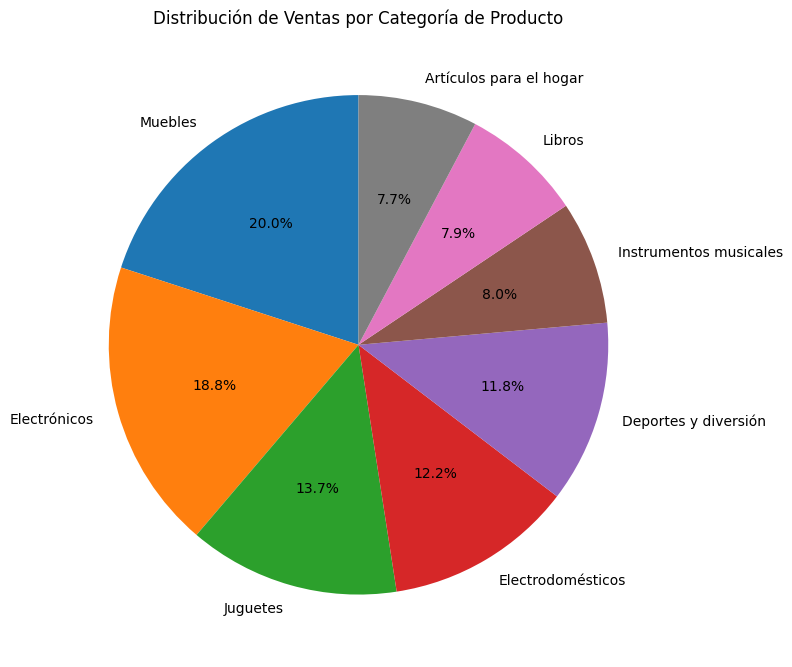

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por categoría de producto
ventas_categoria_total = data_frame_total["Categoría del Producto"].value_counts()

# Gráfico de pastel
plt.figure(figsize=(8, 8))
ventas_categoria_total.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Ventas por Categoría de Producto")
plt.ylabel("")  # Ocultar la etiqueta del eje y
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
def promedio_calificacion(tienda, numero):
  promedio = tienda["Calificación"].mean()
  print(f"La calificación promedio de la tienda {numero} es: {promedio:.2f}")

In [ ]:
promedio_calificacion(tienda, 1)
promedio_calificacion(tienda2, 2)
promedio_calificacion(tienda3, 3)
promedio_calificacion(tienda4, 4)

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [ ]:
# Contar cuántas veces se vendió cada producto
productos_vendidos = data_frame_total["Producto"].value_counts()

# Mostrar los 5 productos más vendidos
print("🔝 Productos más vendidos:")
print(productos_vendidos.head(2))

# Mostrar los 5 productos menos vendidos
print("\n🔽 Productos menos vendidos:")
print(productos_vendidos.tail(2))


🔝 Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Name: count, dtype: int64

🔽 Productos menos vendidos:
Producto
Auriculares con micrófono    158
Celular ABXY                 157
Name: count, dtype: int64


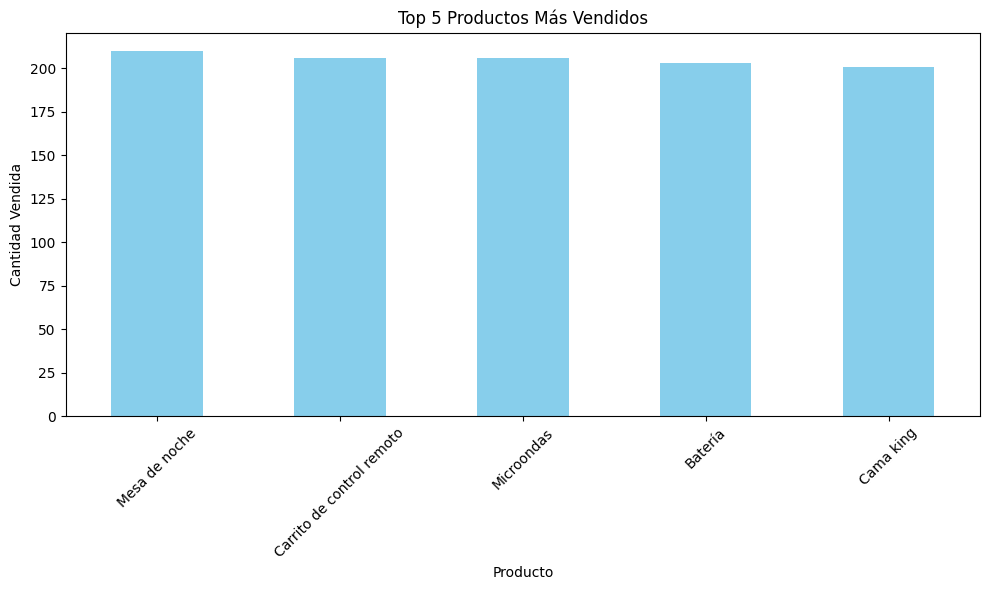

In [ ]:


# Seleccionamos los 5 productos más vendidos
top_5_productos = productos_vendidos.head(5)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
top_5_productos.plot(kind='bar', color='skyblue')
plt.title("Top 5 Productos Más Vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


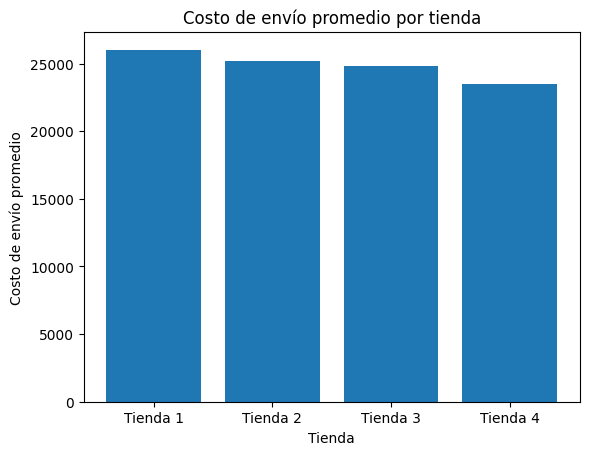

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Unir todos los dataframes y agregar columna con nombre de tienda
data_frame_total = pd.concat([
    tienda.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

# Calcular el costo de envío promedio por tienda
envio_promedio = data_frame_total.groupby("Tienda")["Costo de envío"].mean().round(2)

# Mostrar valores en consola
print(envio_promedio)

# Crear gráfico de barras
plt.bar(envio_promedio.index, envio_promedio.values)
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()


# 6. MAYOR FACTURACIÓN

In [ ]:
# Agrupar por producto y sumar el precio
facturacion_por_producto = data_frame_total.groupby("Producto")["Precio"].sum()

# Mostrar los 5 productos con mayor facturación
print(" Productos con mayor facturación:")
print(facturacion_por_producto.sort_values(ascending=False).head(5))


 Productos con mayor facturación:
Producto
TV LED UHD 4K       432489600.0
Iphone 15           401051200.0
Refrigerador        384937400.0
Smart TV            290221800.0
Lavadora de ropa    242468600.0
Name: Precio, dtype: float64


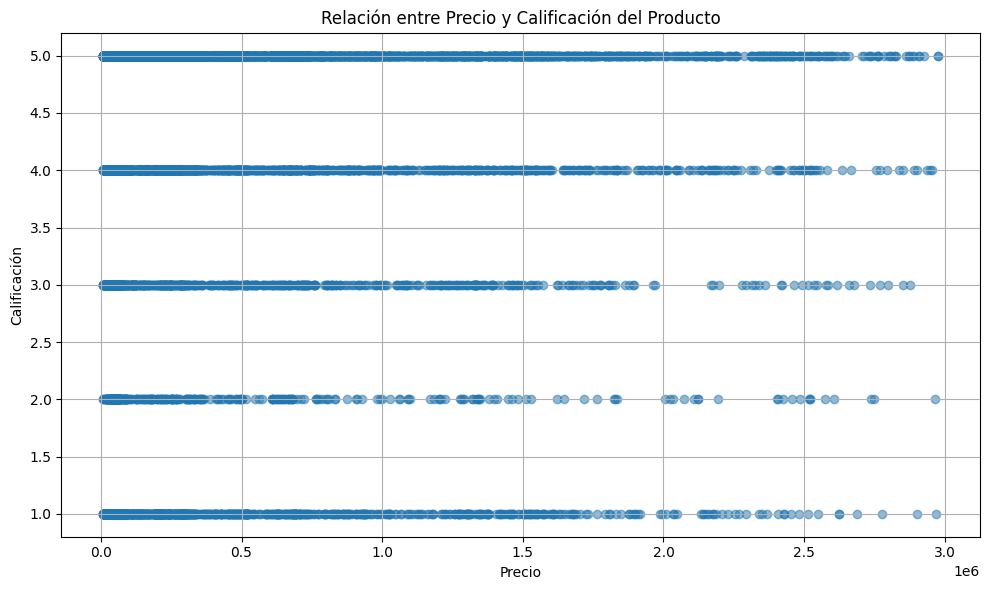

In [ ]:
# Gráfico de dispersión entre precio y calificación
plt.figure(figsize=(10, 6))
plt.scatter(data_frame_total["Precio"], data_frame_total["Calificación"], alpha=0.5)
plt.title("Relación entre Precio y Calificación del Producto")
plt.xlabel("Precio")
plt.ylabel("Calificación")
plt.grid(True)
plt.tight_layout()
plt.show()


# *6. INFORME FINAL*

In [ ]:
    # Informe Final – Recomendación de tienda para el Sr. Juan

# Introducción

# El presente análisis tiene como propósito determinar cuál de las cuatro tiendas representa la mejor opción de venta para el Sr. Juan. Para ello,
# se analizaron diferentes variables presentes en los datos de facturación, como los ingresos totales, categorías de productos vendidas, calificación
# de los clientes, productos más y menos vendidos, y coste promedio de envío por tienda.

# Se utilizaron herramientas de análisis de datos con Python en Google Colab, y se generaron visualizaciones gráficas para una mejor comprensión de los resultados.

In [ ]:
# Desarrollo

# 1. Ingresos totales por tienda

# - Tienda 1: \$1,150,880,400
# - Tienda 2: \$1,116,343,500
# - Tienda 3: \$1,098,019,600
# - Tienda 4: \$1,038,375,700

# La tienda con mayor facturación es la Tienda 1, lo que indica un alto volumen de ingresos generados por ventas.


# 2. Categorías más y menos vendidas

# Las categorías con mayores ventas en todas las tiendas fueron consistentemente Electrónicos y Electrodomésticos, destacándose como las
# de mayor facturación. En contraste, las categorías con menores ventas fueron Libros y Juguetes.

# Esto puede indicar que la demanda está concentrada en productos de tecnología y hogar, siendo más rentable enfocarse en esas líneas de productos.

In [ ]:
# 3. Calificación promedio por tienda

# - Tienda 1: 3.98
# - Tienda 2: 4.04
# - Tienda 3: 4.05
# - Tienda 4: 4.00

# La mejor calificación promedio fue en la **Tienda 3**, lo que sugiere un alto nivel de satisfacción del cliente. La Tienda 1 tiene la
# más baja, aunque aún por encima de 3.9.


# 4. Productos más y menos vendidos

# - Producto más vendido: **Mesa de noche (210 unidades)**
# - Segundo más vendido: **Carrito de control remoto (206 unidades)**
# - Producto menos vendido: **Celular ABXY (157 unidades)**
# - Segundo menos vendido: **Auriculares con micrófono (158 unidades)**

# Esto muestra que hay productos muy populares que pueden tener alto volumen de rotación, lo que es importante para decisiones de inventario.


# 5. Costo promedio de envio por tienda

# Tienda 1    26018.61
# Tienda 2    25216.24
# Tienda 3    24805.68
# Tienda 4    23459.46

# Se muestra un costo mayor desde la tienda 1 y se disminuye de forma continua en las demás tiendas, se asume que al ser la tienda que más
# facturación tiene vale totalmente ese costo extra en la tienda 1.

In [ ]:
# 5. Productos con mayor facturación

# - TV LED UHD 4K: $432,489,600
# - iPhone 15: $401,051,200
# - Refrigerador: $384,937,400
# - Smart TV: $290,221,800
# - Lavadora de ropa: $242,468,600

# Estos productos, aunque no sean los más vendidos en cantidad, representan las mayores ganancias monetarias por unidad.


# Conclusión y recomendación

# Basado en los análisis anteriores, se recomienda que el Sr. Juan venda en la Tienda 1, ya que presenta el mayor nivel de facturación total,
# con una fuerte presencia en categorías de alta demanda como Electrónicos y Electrodomésticos donde la demanda hace que el costo de envio no afecte mucho
# las ganancias y se vea una fuerte tendencia a seguir creciendo

# Aunque su calificación promedio no es la más alta, sigue siendo aceptable (3.98) y no representa una desventaja considerable. La Tienda 1 combina
# volumen de ventas, productos de alta facturación y una base de clientes amplia, lo que la convierte en una opción sólida y rentable para maximizar beneficios.
